# Introduction to Polars

**EuroSciPy 2024, Szczecin**

Contact: **Geir Arne Hjelle**, `geirarne@gmail.com`, <https://github.com/gahjelle/polars-introduction>

**Agenda:**

1. DataFrames for Structuring Data
2. Create DataFrames
3. Work With Tidy Data
4. Manipulate DataFrames
5. Share Results and Insights
6. Saving the Best for Last: Polars is Lazy!

## DataFrames for Structuring Data

A **DataFrame** is the main data structure used in Polars. A DataFrame is analogous to a structured spread sheet. In particular:

- A DataFrame is a **two-dimensional** table of rows and columns
- Each column has a **name**
- All values in a column have the **same data type**
- Each row group related data

Here are some examples of tables organized as DataFrames:

| Time                | Room 6                                                        | Room 5                                                                     |
| :------------------ | :------------------------------------------------------------ | :------------------------------------------------------------------------- |
| 2024-08-26 09:00:00 | Introduction to Python                                        | What is the magic of magic methods in the Python language?                 |
| 2024-08-26 11:00:00 | Introduction to NumPy                                         | Decorators - A deep dive                                                   |
| 2024-08-26 14:00:00 | Introduction to matplotlib for data visualization with Python | Probabilistic classification and cost-sensitive learning with scikit-learn |
| 2024-08-26 16:00:00 | Image Analysis in Python with scikit-image                    | Using the Array API to write code that runs with NumPy, Cupy, and PyTorch  |
| 2024-08-27 09:00:00 | Introduction to Polars: Fast and readable data analysis       | Building robust workflows with strong provenance                           |
| 2024-08-27 11:00:00 | Using Wikipedia as a language corpus for NLP                  | Combining Python and Rust to create Polars plugins                         |
| 2024-08-27 14:00:00 | Introduction to machine learning with scikit-learn and pandas | Multi-dimensional arrays with Scipp                                        |
| 2024-08-27 16:00:00 | A hitchhiker's guide to contributing to open source           | sktime - Python toolbox for time series                                    |

A subset of the data can be presented as follows:

| Room | 09:00                                                   | 11:00                                              | 14:00                                                         | 16:00                                               |
| :--- | :------------------------------------------------------ | :------------------------------------------------- | :------------------------------------------------------------ | :-------------------------------------------------- |
| 6    | Introduction to Polars: Fast and readable data analysis | Using Wikipedia as a language corpus for NLP       | Introduction to machine learning with scikit-learn and pandas | A hitchhiker's guide to contributing to open source |
| 5    | Building robust workflows with strong provenance        | Combining Python and Rust to create Polars plugins | Multi-dimensional arrays with Scipp                           | sktime - Python toolbox for time series             |


## Create DataFrames

At a high level, you can create DataFrames in two ways:

1. From an existing Python data structure in memory, typically nested `dict` and/or `list`
2. From a data source like a file, database, etc

You use `pl.DataFrame()` to convert an existing Python data structure. There are several `read_*()` and `scan_*()` functions in Polars that construct DataFrames from different data sources.

In [1]:
import polars as pl

In [2]:
# Create a DataFrame from a list of dictionaries
tutorials = [
    {
        "time": "09:00",
        "room_6": "Introduction to Polars: Fast and readable data analysis",
        "room_5": "Building robust workflows with strong provenance",
    },
    {
        "time": "11:00",
        "room_6": "Using Wikipedia as a language corpus for NLP",
        "room_5": "Combining Python and Rust to create Polars plugins",
    },
    {
        "time": "14:00",
        "room_6": "Introduction to machine learning with scikit-learn and pandas",
        "room_5": "Multi-dimensional arrays with Scipp",
    },
    {
        "time": "16:00",
        "room_6": "A hitchhiker's guide to contributing to open source",
        "room_5": "sktime - Python toolbox for time series",
    },
]

pl.DataFrame(tutorials)

time,room_6,room_5
str,str,str
"""09:00""","""Introduction to Polars: Fast a…","""Building robust workflows with…"
"""11:00""","""Using Wikipedia as a language …","""Combining Python and Rust to c…"
"""14:00""","""Introduction to machine learni…","""Multi-dimensional arrays with …"
"""16:00""","""A hitchhiker's guide to contri…","""sktime - Python toolbox for ti…"


In [3]:
# Create a DataFrame from a dictionary of lists
tutorials = {
    "time": ["09:00", "11:00", "14:00", "16:00"],
    "room_6": [
        "Introduction to Polars: Fast and readable data analysis",
        "Using Wikipedia as a language corpus for NLP",
        "Introduction to machine learning with scikit-learn and pandas",
        "A hitchhiker's guide to contributing to open source",
    ],
    "room_5": [
        "Building robust workflows with strong provenance",
        "Combining Python and Rust to create Polars plugins",
        "Multi-dimensional arrays with Scipp",
        "sktime - Python toolbox for time series",
    ],
}
pl.DataFrame(tutorials)

time,room_6,room_5
str,str,str
"""09:00""","""Introduction to Polars: Fast a…","""Building robust workflows with…"
"""11:00""","""Using Wikipedia as a language …","""Combining Python and Rust to c…"
"""14:00""","""Introduction to machine learni…","""Multi-dimensional arrays with …"
"""16:00""","""A hitchhiker's guide to contri…","""sktime - Python toolbox for ti…"


In [4]:
# Create a DataFrame from a CSV file
pl.read_csv("data/billboard_songs.csv")

id,artist,track,time,genre
i64,str,str,str,str
0,"""Destiny's Child""","""Independent Women Part I""","""3:38""","""Rock"""
1,"""Santana""","""Maria, Maria""","""4:18""","""Rock"""
2,"""Savage Garden""","""I Knew I Loved You""","""4:07""","""Rock"""
3,"""Madonna""","""Music""","""3:45""","""Rock"""
4,"""Aguilera, Christina""","""Come On Over Baby (All I Want …","""3:38""","""Rock"""
…,…,…,…,…
312,"""Ghostface Killah""","""Cherchez LaGhost""","""3:04""","""R&B"""
313,"""Smith, Will""","""Freakin' It""","""3:58""","""Rap"""
314,"""Zombie Nation""","""Kernkraft 400""","""3:30""","""Rock"""


In [5]:
[function for function in dir(pl) if function.startswith("read_")]

['read_avro',
 'read_clipboard',
 'read_csv',
 'read_csv_batched',
 'read_database',
 'read_database_uri',
 'read_delta',
 'read_excel',
 'read_ipc',
 'read_ipc_schema',
 'read_ipc_stream',
 'read_json',
 'read_ndjson',
 'read_ods',
 'read_parquet',
 'read_parquet_schema']

You can also read files directly from the Internet by supplying a URL. Some sites have extra support, like for
example [Hugging Face](https://huggingface.co/docs/hub/en/datasets-polars) with a special `hf://` protocol.

In [6]:
pl.read_csv(
    "hf://datasets/commoncrawl/statistics/tlds.csv"
)

,suffix,crawl,date,type,subtype,tld,pages,urls,hosts,domains
i64,str,str,str,str,str,str,i64,i64,f64,f64
0,"""a.se""","""CC-MAIN-2008-2009""","""2009-01-12""","""ccTLD""","""second-level""","""se""",18,18,1.0,1.0
1,"""a.se""","""CC-MAIN-2009-2010""","""2010-09-25""","""ccTLD""","""second-level""","""se""",3462,3259,166.0,151.0
2,"""a.se""","""CC-MAIN-2012""","""2012-11-02""","""ccTLD""","""second-level""","""se""",6957,6794,172.0,150.0
3,"""a.se""","""CC-MAIN-2013-20""","""2013-05-13""","""ccTLD""","""second-level""","""se""",613,600,50.0,46.0
4,"""a.se""","""CC-MAIN-2013-48""","""2013-11-25""","""ccTLD""","""second-level""","""se""",224,222,35.0,34.0
…,…,…,…,…,…,…,…,…,…,…
483163,"""fajr.nom.br""","""CC-MAIN-2024-33""","""2024-08-12""","""ccTLD""","""second-level""","""br""",4,4,1.0,1.0
483164,"""gkp.pk""","""CC-MAIN-2024-33""","""2024-08-12""","""ccTLD""","""second-level""","""pk""",859,853,14.0,14.0
483165,"""gog.pk""","""CC-MAIN-2024-33""","""2024-08-12""","""ccTLD""","""second-level""","""pk""",34,34,3.0,3.0


In [7]:
pl.read_parquet(
    "hf://datasets/commoncrawl/statistics@~parquet/Top-level domains/train/0000.parquet"
)

Unnamed: 0,suffix,crawl,date,type,subtype,tld,pages,urls,hosts,domains
i64,str,str,str,str,str,str,i64,i64,f64,f64
0,"""a.se""","""CC-MAIN-2008-2009""","""2009-01-12""","""ccTLD""","""second-level""","""se""",18,18,1.0,1.0
1,"""a.se""","""CC-MAIN-2009-2010""","""2010-09-25""","""ccTLD""","""second-level""","""se""",3462,3259,166.0,151.0
2,"""a.se""","""CC-MAIN-2012""","""2012-11-02""","""ccTLD""","""second-level""","""se""",6957,6794,172.0,150.0
3,"""a.se""","""CC-MAIN-2013-20""","""2013-05-13""","""ccTLD""","""second-level""","""se""",613,600,50.0,46.0
4,"""a.se""","""CC-MAIN-2013-48""","""2013-11-25""","""ccTLD""","""second-level""","""se""",224,222,35.0,34.0
…,…,…,…,…,…,…,…,…,…,…
483163,"""fajr.nom.br""","""CC-MAIN-2024-33""","""2024-08-12""","""ccTLD""","""second-level""","""br""",4,4,1.0,1.0
483164,"""gkp.pk""","""CC-MAIN-2024-33""","""2024-08-12""","""ccTLD""","""second-level""","""pk""",859,853,14.0,14.0
483165,"""gog.pk""","""CC-MAIN-2024-33""","""2024-08-12""","""ccTLD""","""second-level""","""pk""",34,34,3.0,3.0


## Work With Tidy Data

Hadley Wickham introduced the term **tidy data** (<https://tidyr.tidyverse.org/articles/tidy-data.html>). Data tidying is a way to **structure DataFrames to facilitate analysis**.

A DataFrame is tidy if:

- Each variable is a column
- Each observation is a row
- Each DataFrame contains one observational unit

Note that tidy data principles are closely tied to normalization of relational databases.

Is the following DataFrame tidy?

In [8]:
schedule = pl.DataFrame(tutorials)
schedule

time,room_6,room_5
str,str,str
"""09:00""","""Introduction to Polars: Fast a…","""Building robust workflows with…"
"""11:00""","""Using Wikipedia as a language …","""Combining Python and Rust to c…"
"""14:00""","""Introduction to machine learni…","""Multi-dimensional arrays with …"
"""16:00""","""A hitchhiker's guide to contri…","""sktime - Python toolbox for ti…"


What about the following DataFrame?

In [9]:
schedule.transpose(include_header=True, header_name="room", column_names="time")

room,09:00,11:00,14:00,16:00
str,str,str,str,str
"""room_6""","""Introduction to Polars: Fast a…","""Using Wikipedia as a language …","""Introduction to machine learni…","""A hitchhiker's guide to contri…"
"""room_5""","""Building robust workflows with…","""Combining Python and Rust to c…","""Multi-dimensional arrays with …","""sktime - Python toolbox for ti…"


What are the variables in the dataset? Time slots, rooms, and tutorial titles. They should each be their own column. Tidy the dataset:

In [10]:
(
    schedule.unpivot(index="time", variable_name="room", value_name="title").sort(
        by=["time", "room"]
    )
)

time,room,title
str,str,str
"""09:00""","""room_5""","""Building robust workflows with…"
"""09:00""","""room_6""","""Introduction to Polars: Fast a…"
"""11:00""","""room_5""","""Combining Python and Rust to c…"
"""11:00""","""room_6""","""Using Wikipedia as a language …"
"""14:00""","""room_5""","""Multi-dimensional arrays with …"
"""14:00""","""room_6""","""Introduction to machine learni…"
"""16:00""","""room_5""","""sktime - Python toolbox for ti…"
"""16:00""","""room_6""","""A hitchhiker's guide to contri…"


Being conscious of tidy data lets you standardize your **data cleaning** and **analysis**:

1. Tidy your data set
2. Clean your data (e.g. check outliers, parse dates, impute missing values)
3. Analyze
4. Share and visualize

**Note:** Datasets from Hadley Wickham's Tidy Data paper are at <https://github.com/hadley/tidy-data/tree/master/data>

## Manipulate DataFrames

Polars DataFrames have many methods you can use to manipulate your data, and
you'll explore some of them now. In a tidy workflow, you think about methods
in different categories:

- **Filter:** remove observations
- **Transform:** add or modify variables based on existing variables
- **Aggregate:** collapse multiple values into a single value
- **Sort:** change the order of observations

Polars uses the concept of **contexts** which map fairly nicely with the tidy categories:

- **Selection**
- **Filter**
- **Group by / Aggregation**

In [11]:
schedule = pl.read_csv("data/schedule.csv", try_parse_dates=True)
schedule

timestamp,room,title
datetime[μs],i64,str
2024-08-26 09:00:00,6,"""Introduction to Python"""
2024-08-26 09:00:00,5,"""What is the magic of magic met…"
2024-08-26 11:00:00,6,"""Introduction to NumPy"""
2024-08-26 11:00:00,5,"""Decorators - A deep dive"""
2024-08-26 14:00:00,6,"""Introduction to matplotlib for…"
…,…,…
2024-08-27 11:00:00,5,"""Combining Python and Rust to c…"
2024-08-27 14:00:00,6,"""Introduction to machine learni…"
2024-08-27 14:00:00,5,"""Multi-dimensional arrays with …"


In [12]:
songs = pl.read_csv("data/billboard_songs.csv")
ranks = pl.read_csv("data/billboard_ranks.csv", try_parse_dates=True)
songs

id,artist,track,time,genre
i64,str,str,str,str
0,"""Destiny's Child""","""Independent Women Part I""","""3:38""","""Rock"""
1,"""Santana""","""Maria, Maria""","""4:18""","""Rock"""
2,"""Savage Garden""","""I Knew I Loved You""","""4:07""","""Rock"""
3,"""Madonna""","""Music""","""3:45""","""Rock"""
4,"""Aguilera, Christina""","""Come On Over Baby (All I Want …","""3:38""","""Rock"""
…,…,…,…,…
312,"""Ghostface Killah""","""Cherchez LaGhost""","""3:04""","""R&B"""
313,"""Smith, Will""","""Freakin' It""","""3:58""","""Rap"""
314,"""Zombie Nation""","""Kernkraft 400""","""3:30""","""Rock"""


### Filter

In [13]:
songs.select(pl.col("artist", "track", "time"))

artist,track,time
str,str,str
"""Destiny's Child""","""Independent Women Part I""","""3:38"""
"""Santana""","""Maria, Maria""","""4:18"""
"""Savage Garden""","""I Knew I Loved You""","""4:07"""
"""Madonna""","""Music""","""3:45"""
"""Aguilera, Christina""","""Come On Over Baby (All I Want …","""3:38"""
…,…,…
"""Ghostface Killah""","""Cherchez LaGhost""","""3:04"""
"""Smith, Will""","""Freakin' It""","""3:58"""
"""Zombie Nation""","""Kernkraft 400""","""3:30"""


In [14]:
schedule.select(pl.col("timestamp", "title"))

timestamp,title
datetime[μs],str
2024-08-26 09:00:00,"""Introduction to Python"""
2024-08-26 09:00:00,"""What is the magic of magic met…"
2024-08-26 11:00:00,"""Introduction to NumPy"""
2024-08-26 11:00:00,"""Decorators - A deep dive"""
2024-08-26 14:00:00,"""Introduction to matplotlib for…"
…,…
2024-08-27 11:00:00,"""Combining Python and Rust to c…"
2024-08-27 14:00:00,"""Introduction to machine learni…"
2024-08-27 14:00:00,"""Multi-dimensional arrays with …"


In [15]:
schedule.select(pl.all().exclude("room"))

timestamp,title
datetime[μs],str
2024-08-26 09:00:00,"""Introduction to Python"""
2024-08-26 09:00:00,"""What is the magic of magic met…"
2024-08-26 11:00:00,"""Introduction to NumPy"""
2024-08-26 11:00:00,"""Decorators - A deep dive"""
2024-08-26 14:00:00,"""Introduction to matplotlib for…"
…,…
2024-08-27 11:00:00,"""Combining Python and Rust to c…"
2024-08-27 14:00:00,"""Introduction to machine learni…"
2024-08-27 14:00:00,"""Multi-dimensional arrays with …"


In [16]:
schedule.filter(pl.col("room") == 5)

timestamp,room,title
datetime[μs],i64,str
2024-08-26 09:00:00,5,"""What is the magic of magic met…"
2024-08-26 11:00:00,5,"""Decorators - A deep dive"""
2024-08-26 14:00:00,5,"""Probabilistic classification a…"
2024-08-26 16:00:00,5,"""Using the Array API to write c…"
2024-08-27 09:00:00,5,"""Building robust workflows with…"
2024-08-27 11:00:00,5,"""Combining Python and Rust to c…"
2024-08-27 14:00:00,5,"""Multi-dimensional arrays with …"
2024-08-27 16:00:00,5,"""sktime - Python toolbox for ti…"


In [17]:
schedule.filter(pl.col("timestamp").dt.hour() == 11)

timestamp,room,title
datetime[μs],i64,str
2024-08-26 11:00:00,6,"""Introduction to NumPy"""
2024-08-26 11:00:00,5,"""Decorators - A deep dive"""
2024-08-27 11:00:00,6,"""Using Wikipedia as a language …"
2024-08-27 11:00:00,5,"""Combining Python and Rust to c…"


In [18]:
schedule.filter(pl.col("title").str.starts_with("Intro"))

timestamp,room,title
datetime[μs],i64,str
2024-08-26 09:00:00,6,"""Introduction to Python"""
2024-08-26 11:00:00,6,"""Introduction to NumPy"""
2024-08-26 14:00:00,6,"""Introduction to matplotlib for…"
2024-08-27 09:00:00,6,"""Introduction to Polars: Fast a…"
2024-08-27 14:00:00,6,"""Introduction to machine learni…"


In [19]:
schedule.filter(pl.col("title").str.contains("scikit"))

timestamp,room,title
datetime[μs],i64,str
2024-08-26 14:00:00,5,"""Probabilistic classification a…"
2024-08-26 16:00:00,6,"""Image Analysis in Python with …"
2024-08-27 14:00:00,6,"""Introduction to machine learni…"


In [20]:
songs.filter(pl.col("artist") == "Jay-Z").select(pl.col("track", "time"))

track,time
str,str
"""I Just Wanna Love U (Give It 2…","""3:50"""
"""Big Pimpin'""","""3:55"""
"""Anything""","""3:41"""
"""Do It Again (Put Ya Hands Up)""","""3:47"""
"""Hey Papi""","""3:40"""


In [21]:
ranks.select(pl.col(pl.Int64))

id,rank
i64,i64
0,78
0,63
0,49
0,33
0,23
…,…
314,99
314,99
315,99


### Aggregate

In [22]:
ranks.sum()

id,date,rank
i64,date,i64
633989,null,270935


In [23]:
ranks.select(pl.col(pl.Int64)).mean()

id,rank
f64,f64
119.462785,51.052384


In [24]:
ranks.group_by("id").agg(pl.len())  #.sort(by=pl.col("len"), descending=True)

id,len
i64,u32
3,24
304,5
137,15
271,1
36,27
…,…
232,5
220,15
256,15


In [25]:
ranks.group_by("id").agg(pl.first("date", "rank"))

id,date,rank
i64,date,i64
45,2000-03-04,25
9,1999-06-05,81
310,2000-08-12,99
268,2000-01-22,80
170,2000-11-25,77
…,…,…
244,2000-09-09,82
116,2000-01-15,70
110,2000-02-19,69


In [26]:
ranks.group_by("id").agg(pl.first("date"), pl.min("rank"))

id,date,rank
i64,date,i64
30,2000-01-29,4
298,2000-05-13,91
301,2000-04-01,92
18,2000-08-19,2
27,1999-09-04,4
…,…,…
235,2000-09-02,69
259,2000-12-16,75
232,2000-12-02,68


In [27]:
ranks.group_by("id").agg(
    pl.first("date").alias("date_entered"), pl.min("rank").alias("best_rank")
)

id,date_entered,best_rank
i64,date,i64
21,2000-02-26,2
268,2000-01-22,76
304,2000-07-08,95
39,2000-01-01,6
155,2000-04-15,40
…,…,…
223,2000-03-04,64
119,2000-10-14,29
238,2000-09-16,70


In [28]:
billboard = songs.join(ranks, left_on="id", right_on="id", how="inner")
billboard

id,artist,track,time,genre,date,rank
i64,str,str,str,str,date,i64
0,"""Destiny's Child""","""Independent Women Part I""","""3:38""","""Rock""",2000-09-23,78
0,"""Destiny's Child""","""Independent Women Part I""","""3:38""","""Rock""",2000-09-30,63
0,"""Destiny's Child""","""Independent Women Part I""","""3:38""","""Rock""",2000-10-07,49
0,"""Destiny's Child""","""Independent Women Part I""","""3:38""","""Rock""",2000-10-14,33
0,"""Destiny's Child""","""Independent Women Part I""","""3:38""","""Rock""",2000-10-21,23
…,…,…,…,…,…,…
314,"""Zombie Nation""","""Kernkraft 400""","""3:30""","""Rock""",2000-09-02,99
314,"""Zombie Nation""","""Kernkraft 400""","""3:30""","""Rock""",2000-09-09,99
315,"""Eastsidaz, The""","""Got Beef""","""3:58""","""Rap""",2000-07-01,99


In [29]:
for song_id, info in billboard.group_by("id"):
    if info["rank"].min() == 1:
        print(info.filter(pl.col("rank") == 1))

shape: (3, 7)
┌─────┬─────────────────┬─────────────┬──────┬───────┬────────────┬──────┐
│ id  ┆ artist          ┆ track       ┆ time ┆ genre ┆ date       ┆ rank │
│ --- ┆ ---             ┆ ---         ┆ ---  ┆ ---   ┆ ---        ┆ ---  │
│ i64 ┆ str             ┆ str         ┆ str  ┆ str   ┆ date       ┆ i64  │
╞═════╪═════════════════╪═════════════╪══════╪═══════╪════════════╪══════╡
│ 6   ┆ Destiny's Child ┆ Say My Name ┆ 4:31 ┆ Rock  ┆ 2000-03-18 ┆ 1    │
│ 6   ┆ Destiny's Child ┆ Say My Name ┆ 4:31 ┆ Rock  ┆ 2000-03-25 ┆ 1    │
│ 6   ┆ Destiny's Child ┆ Say My Name ┆ 4:31 ┆ Rock  ┆ 2000-04-01 ┆ 1    │
└─────┴─────────────────┴─────────────┴──────┴───────┴────────────┴──────┘
shape: (2, 7)
┌─────┬──────────┬────────┬──────┬─────────┬────────────┬──────┐
│ id  ┆ artist   ┆ track  ┆ time ┆ genre   ┆ date       ┆ rank │
│ --- ┆ ---      ┆ ---    ┆ ---  ┆ ---     ┆ ---        ┆ ---  │
│ i64 ┆ str      ┆ str    ┆ str  ┆ str     ┆ date       ┆ i64  │
╞═════╪══════════╪════════╪══════╪═══

### Transform

In [30]:
schedule.select(
    pl.col("timestamp").dt.date().alias("date"),
    pl.col("timestamp").dt.time().alias("time"),
    pl.col("room"),
    pl.col("title"),
)

date,time,room,title
date,time,i64,str
2024-08-26,09:00:00,6,"""Introduction to Python"""
2024-08-26,09:00:00,5,"""What is the magic of magic met…"
2024-08-26,11:00:00,6,"""Introduction to NumPy"""
2024-08-26,11:00:00,5,"""Decorators - A deep dive"""
2024-08-26,14:00:00,6,"""Introduction to matplotlib for…"
…,…,…,…
2024-08-27,11:00:00,5,"""Combining Python and Rust to c…"
2024-08-27,14:00:00,6,"""Introduction to machine learni…"
2024-08-27,14:00:00,5,"""Multi-dimensional arrays with …"


In [31]:
schedule.with_columns(
    pl.col("timestamp").dt.date().alias("date"),
    pl.col("timestamp").dt.time().alias("time"),
).drop("timestamp")

room,title,date,time
i64,str,date,time
6,"""Introduction to Python""",2024-08-26,09:00:00
5,"""What is the magic of magic met…",2024-08-26,09:00:00
6,"""Introduction to NumPy""",2024-08-26,11:00:00
5,"""Decorators - A deep dive""",2024-08-26,11:00:00
6,"""Introduction to matplotlib for…",2024-08-26,14:00:00
…,…,…,…
5,"""Combining Python and Rust to c…",2024-08-27,11:00:00
6,"""Introduction to machine learni…",2024-08-27,14:00:00
5,"""Multi-dimensional arrays with …",2024-08-27,14:00:00


In [32]:
(
    billboard.group_by("id", artist="artist", track="track")
    .agg(
        pl.col("date").min().alias("date_entered"),
        pl.col("rank").min().alias("peak_position"),
        pl.col("rank").len().alias("num_weeks"),
        pl.col("rank").mean().alias("avg_position"),
    )
    .with_columns((pl.col("num_weeks") * (100 - pl.col("avg_position"))).alias("score"))
)

id,artist,track,date_entered,peak_position,num_weeks,avg_position,score
i64,str,str,date,i64,u32,f64,f64
216,"""Simpson, Jessica""","""Where You Are""",2000-04-01,62,6,72.0,168.0
235,"""Third Eye Blind""","""Deep Inside Of You""",2000-09-02,69,12,79.833333,242.0
226,"""Jay-Z""","""Do It Again (Put Ya Hands Up)""",2000-01-15,65,9,81.555556,166.0
250,"""Lox""","""Ryde or Die, Chick""",2000-03-18,73,7,86.857143,92.0
82,"""Ludacris""","""What's Your Fantasy""",2000-09-30,21,22,38.863636,1345.0
…,…,…,…,…,…,…,…
115,"""McGraw, Tim""","""My Best Friend""",1999-11-27,29,21,47.333333,1106.0
145,"""Jean, Wyclef""","""911""",2000-10-07,38,19,60.0,760.0
225,"""Hot Boys""","""I Need A Hot Girl""",2000-02-19,65,13,78.846154,275.0


### Sort

In [33]:
scored_billboard = (
    billboard.group_by("id", artist="artist", track="track")
    .agg(
        pl.col("date").min().alias("date_entered"),
        pl.col("rank").min().alias("peak_position"),
        pl.col("rank").len().alias("num_weeks"),
        pl.col("rank").mean().alias("avg_position"),
    )
    .with_columns((pl.col("num_weeks") * (100 - pl.col("avg_position"))).alias("score"))
)

In [34]:
scored_billboard.sort(by="id")

id,artist,track,date_entered,peak_position,num_weeks,avg_position,score
i64,str,str,date,i64,u32,f64,f64
0,"""Destiny's Child""","""Independent Women Part I""",2000-09-23,1,28,14.821429,2385.0
1,"""Santana""","""Maria, Maria""",2000-02-12,1,26,10.5,2327.0
2,"""Savage Garden""","""I Knew I Loved You""",1999-10-23,1,33,17.363636,2727.0
3,"""Madonna""","""Music""",2000-08-12,1,24,13.458333,2077.0
4,"""Aguilera, Christina""","""Come On Over Baby (All I Want …",2000-08-05,1,21,19.952381,1681.0
…,…,…,…,…,…,…,…
312,"""Ghostface Killah""","""Cherchez LaGhost""",2000-08-05,98,1,98.0,2.0
313,"""Smith, Will""","""Freakin' It""",2000-02-12,99,4,99.0,4.0
314,"""Zombie Nation""","""Kernkraft 400""",2000-09-02,99,2,99.0,2.0


In [35]:
scored_billboard.sort(by=pl.col("artist"))

id,artist,track,date_entered,peak_position,num_weeks,avg_position,score
i64,str,str,date,i64,u32,f64,f64
246,"""2 Pac""","""Baby Don't Cry (Keep Ya Head U…",2000-02-26,72,7,85.428571,102.0
287,"""2Ge+her""","""The Hardest Part Of Breaking U…",2000-09-02,87,3,90.0,30.0
24,"""3 Doors Down""","""Kryptonite""",2000-04-08,3,53,26.471698,3897.0
193,"""3 Doors Down""","""Loser""",2000-10-21,55,20,67.1,658.0
69,"""504 Boyz""","""Wobble Wobble""",2000-04-15,17,18,56.222222,788.0
…,…,…,…,…,…,…,…
254,"""Yankee Grey""","""Another Nine Minutes""",2000-04-29,74,8,83.125,135.0
277,"""Yearwood, Trisha""","""Real Live Woman""",2000-04-01,81,6,84.166667,95.0
251,"""Ying Yang Twins""","""Whistle While You Twurk""",2000-03-18,74,14,88.857143,156.0


In [36]:
scored_billboard.sort(by=pl.col("artist").str.to_lowercase())

id,artist,track,date_entered,peak_position,num_weeks,avg_position,score
i64,str,str,date,i64,u32,f64,f64
246,"""2 Pac""","""Baby Don't Cry (Keep Ya Head U…",2000-02-26,72,7,85.428571,102.0
287,"""2Ge+her""","""The Hardest Part Of Breaking U…",2000-09-02,87,3,90.0,30.0
24,"""3 Doors Down""","""Kryptonite""",2000-04-08,3,53,26.471698,3897.0
193,"""3 Doors Down""","""Loser""",2000-10-21,55,20,67.1,658.0
69,"""504 Boyz""","""Wobble Wobble""",2000-04-15,17,18,56.222222,788.0
…,…,…,…,…,…,…,…
223,"""Wright, Chely""","""It Was""",2000-03-04,64,10,77.3,227.0
254,"""Yankee Grey""","""Another Nine Minutes""",2000-04-29,74,8,83.125,135.0
277,"""Yearwood, Trisha""","""Real Live Woman""",2000-04-01,81,6,84.166667,95.0


In [37]:
scored_billboard.sort(by="num_weeks", descending=True)

id,artist,track,date_entered,peak_position,num_weeks,avg_position,score
i64,str,str,date,i64,u32,f64,f64
46,"""Creed""","""Higher""",1999-09-11,7,57,36.859649,3599.0
9,"""Lonestar""","""Amazed""",1999-06-05,1,55,26.727273,4030.0
24,"""3 Doors Down""","""Kryptonite""",2000-04-08,3,53,26.471698,3897.0
17,"""Hill, Faith""","""Breathe""",1999-11-06,2,53,23.018868,4080.0
13,"""Creed""","""With Arms Wide Open""",2000-05-13,1,47,33.829787,3110.0
…,…,…,…,…,…,…,…
315,"""Eastsidaz, The""","""Got Beef""",2000-07-01,99,2,99.0,2.0
271,"""Estefan, Gloria""","""No Me Dejes De Querer""",2000-06-10,77,1,77.0,23.0
312,"""Ghostface Killah""","""Cherchez LaGhost""",2000-08-05,98,1,98.0,2.0


In [38]:
scored_billboard.sort(by=["peak_position", "num_weeks"], descending=[False, True])

id,artist,track,date_entered,peak_position,num_weeks,avg_position,score
i64,str,str,date,i64,u32,f64,f64
9,"""Lonestar""","""Amazed""",1999-06-05,1,55,26.727273,4030.0
13,"""Creed""","""With Arms Wide Open""",2000-05-13,1,47,33.829787,3110.0
12,"""Vertical Horizon""","""Everything You Want""",2000-01-22,1,41,21.439024,3221.0
15,"""matchbox twenty""","""Bent""",2000-04-29,1,39,18.641026,3173.0
2,"""Savage Garden""","""I Knew I Loved You""",1999-10-23,1,33,17.363636,2727.0
…,…,…,…,…,…,…,…
311,"""Master P""","""Souljas""",2000-11-18,98,1,98.0,2.0
313,"""Smith, Will""","""Freakin' It""",2000-02-12,99,4,99.0,4.0
314,"""Zombie Nation""","""Kernkraft 400""",2000-09-02,99,2,99.0,2.0


In [39]:
scored_billboard.sort(by=pl.col("score"), descending=True)

id,artist,track,date_entered,peak_position,num_weeks,avg_position,score
i64,str,str,date,i64,u32,f64,f64
17,"""Hill, Faith""","""Breathe""",1999-11-06,2,53,23.018868,4080.0
9,"""Lonestar""","""Amazed""",1999-06-05,1,55,26.727273,4030.0
24,"""3 Doors Down""","""Kryptonite""",2000-04-08,3,53,26.471698,3897.0
46,"""Creed""","""Higher""",1999-09-11,7,57,36.859649,3599.0
28,"""Joe""","""I Wanna Know""",2000-01-01,4,44,21.204545,3467.0
…,…,…,…,…,…,…,…
312,"""Ghostface Killah""","""Cherchez LaGhost""",2000-08-05,98,1,98.0,2.0
314,"""Zombie Nation""","""Kernkraft 400""",2000-09-02,99,2,99.0,2.0
311,"""Master P""","""Souljas""",2000-11-18,98,1,98.0,2.0


## Share Results and Insights

When you want to share your insights, you often want to **untidy** your data again:

In [40]:
schedule.pivot(on="room", index="timestamp", values="title")

timestamp,6,5
datetime[μs],str,str
2024-08-26 09:00:00,"""Introduction to Python""","""What is the magic of magic met…"
2024-08-26 11:00:00,"""Introduction to NumPy""","""Decorators - A deep dive"""
2024-08-26 14:00:00,"""Introduction to matplotlib for…","""Probabilistic classification a…"
2024-08-26 16:00:00,"""Image Analysis in Python with …","""Using the Array API to write c…"
2024-08-27 09:00:00,"""Introduction to Polars: Fast a…","""Building robust workflows with…"
2024-08-27 11:00:00,"""Using Wikipedia as a language …","""Combining Python and Rust to c…"
2024-08-27 14:00:00,"""Introduction to machine learni…","""Multi-dimensional arrays with …"
2024-08-27 16:00:00,"""A hitchhiker's guide to contri…","""sktime - Python toolbox for ti…"


In the same way you can use Polars to read from many different data sources, you can also write to many different outputs, both in memory and on file.

In [41]:
[
    method
    for method in dir(schedule)
    if method.startswith("to_") or method.startswith("write_")
]

['to_arrow',
 'to_dict',
 'to_dicts',
 'to_dummies',
 'to_init_repr',
 'to_jax',
 'to_numpy',
 'to_pandas',
 'to_series',
 'to_struct',
 'to_torch',
 'write_avro',
 'write_clipboard',
 'write_csv',
 'write_database',
 'write_delta',
 'write_excel',
 'write_ipc',
 'write_ipc_stream',
 'write_json',
 'write_ndjson',
 'write_parquet']

In [42]:
(
    scored_billboard.sort(by="score", descending=True)
    .head(10)
    .select(pl.col("artist", "track", "num_weeks"))
    .write_csv("top_songs_2000.csv")
)

In [43]:
ranks.plot.scatter(x="date", y="rank", alpha=0.4)

:Scatter   [date]   (rank)

In [44]:
from IPython.display import display

for id, group in billboard.filter(pl.col("id") < 5).group_by("id", maintain_order=True):
    display(
        group.plot.line(x="date", y="rank", title=f"{group.item(0, "artist")} - {group.item(0, "track")}")
        * group.plot.scatter(x="date", y="rank", marker="+")
    )

:Overlay
   .Curve.I   :Curve   [date]   (rank)
   .Scatter.I :Scatter   [date]   (rank)

:Overlay
   .Curve.I   :Curve   [date]   (rank)
   .Scatter.I :Scatter   [date]   (rank)

:Overlay
   .Curve.I   :Curve   [date]   (rank)
   .Scatter.I :Scatter   [date]   (rank)

:Overlay
   .Curve.I   :Curve   [date]   (rank)
   .Scatter.I :Scatter   [date]   (rank)

:Overlay
   .Curve.I   :Curve   [date]   (rank)
   .Scatter.I :Scatter   [date]   (rank)

## Saving the Best for Last: Polars is Lazy!

Polars fully supports so-called **lazy data frames** with `pl.LazyFrame()`. In a lazy data frame, no calculations are performed until necessary. This allows Polars to optimize the calculations and increase performance, often significantly.

You should prefer lazy frames over eager frames in most cases! One notable exception is when you're doing exploratory work (or teaching a tutorial) where quickly iterating on your code is more important than the speed of calculations.

To create a lazy data frame, you can do one of the following:

- Read data with `scan_*()` instead of `read_*()`
- Construct a data frame with `pl.LazyFrame()` instead of `pl.DataFrame()`
- Convert an eager data frame by calling `.lazy()`

In [45]:
pl.scan_csv("data/schedule.csv")

In [46]:
pl.LazyFrame(tutorials)

In [47]:
billboard.lazy()

Look at some simple manipulation of the schedule:

In [48]:
tuesday_intro = (
    pl.scan_csv("data/schedule.csv")
    .with_columns(title=pl.col("title").str.to_uppercase())
    .filter(pl.col("timestamp") >= "2024-08-27")
)

At this point, no calculations have been made. The file hasn't even been read! You can explicitly tell Polars to run the query by calling `.collect()`:

In [49]:
tuesday_intro.collect()

timestamp,room,title
str,i64,str
"""2024-08-27T09:00""",6,"""INTRODUCTION TO POLARS: FAST A…"
"""2024-08-27T09:00""",5,"""BUILDING ROBUST WORKFLOWS WITH…"
"""2024-08-27T11:00""",6,"""USING WIKIPEDIA AS A LANGUAGE …"
"""2024-08-27T11:00""",5,"""COMBINING PYTHON AND RUST TO C…"
"""2024-08-27T14:00""",6,"""INTRODUCTION TO MACHINE LEARNI…"
"""2024-08-27T14:00""",5,"""MULTI-DIMENSIONAL ARRAYS WITH …"
"""2024-08-27T16:00""",6,"""A HITCHHIKER'S GUIDE TO CONTRI…"
"""2024-08-27T16:00""",5,"""SKTIME - PYTHON TOOLBOX FOR TI…"


Look again at the lazy data frame. Jupyter displays a query plan, which describes which calculations that will be carried out. However, note the comment about an **optimized** query plan:

In [50]:
tuesday_intro

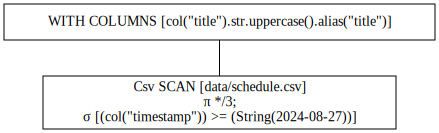

In [51]:
tuesday_intro.show_graph()

Polars can do [several optimizations](https://docs.pola.rs/user-guide/lazy/optimizations/) before carrying out a query. In this case, it has realized that the filtering can be done earlier - actually while reading the file from disk - instead of first upper-casing many titles just to filter them out later!

## Next Steps

While Polars is still somewhat new, it recently reached its [**Version 1** milestone](https://pola.rs/posts/announcing-polars-1/) and is production ready!

- [Polars documentation](https://docs.pola.rs/)
- [Modern Polars](https://kevinheavey.github.io/modern-polars/): Comparison to pandas based on the [Modern pandas](http://tomaugspurger.net/posts/modern-1-intro/) blog post
- [Effective Polars](https://store.metasnake.com/effective-polars): Book by Matt Harrison
- [Polars Workshop](https://justinbois.github.io/dd-pol/2024/part_1/lessons/01/intro_to_polars.html): Notes by Justin Bois
- [Great tables](https://posit-dev.github.io/great-tables/blog/polars-styling/): Present Polars data frames as beautiful tables

In [52]:
from great_tables import GT, loc, style

schedule_table = (
    schedule.pivot(on="room", index="timestamp", values="title")
    .select(
        pl.col("timestamp").dt.date().alias("Date"),
        pl.col("timestamp").dt.time().alias("Time"),
        pl.col("6").alias("Room 6"),
        pl.col("5").alias("Room 5"),
    )
)

(
    GT(schedule_table)
    .tab_header(
        title="EuroSciPy 2024",
        subtitle="Tutorials in Szczecin",
    )
    .tab_spanner(
        label="When",
        columns=["Date", "Time"],
    )
    .tab_style(
        style.text(weight="bold"),
        loc.body("Room 6", pl.col("Room 6").str.contains("Polars"))
    )
)

GT(_tbl_data=shape: (8, 4)
┌────────────┬──────────┬─────────────────────────────────┬─────────────────────────────────┐
│ Date       ┆ Time     ┆ Room 6                          ┆ Room 5                          │
│ ---        ┆ ---      ┆ ---                             ┆ ---                             │
│ date       ┆ time     ┆ str                             ┆ str                             │
╞════════════╪══════════╪═════════════════════════════════╪═════════════════════════════════╡
│ 2024-08-26 ┆ 09:00:00 ┆ Introduction to Python          ┆ What is the magic of magic met… │
│ 2024-08-26 ┆ 11:00:00 ┆ Introduction to NumPy           ┆ Decorators - A deep dive        │
│ 2024-08-26 ┆ 14:00:00 ┆ Introduction to matplotlib for… ┆ Probabilistic classification a… │
│ 2024-08-26 ┆ 16:00:00 ┆ Image Analysis in Python with … ┆ Using the Array API to write c… │
│ 2024-08-27 ┆ 09:00:00 ┆ Introduction to Polars: Fast a… ┆ Building robust workflows with… │
│ 2024-08-27 ┆ 11:00:00 ┆ Using Wikipedia as a language … ┆ Combining Python and Rust to c… │
│ 2024-08-27 ┆ 14:00:00 ┆ Introduction to machine learni… ┆ Multi-dimensional arrays with … │
│ 2024-08-27 ┆ 16:00:00 ┆ A hitchhiker's guide to contri… ┆ sktime - Python toolbox for ti… │
└────────────┴──────────┴─────────────────────────────────┴─────────────────────────────────┘, _body=<great_tables._gt_data.Body object at 0x7f17c5477f20>, _boxhead=Boxhead([ColInfo(var='Date', type=<ColInfoTypeEnum.default: 1>, column_label='Date', column_align='right', column_width=None), ColInfo(var='Time', type=<ColInfoTypeEnum.default: 1>, column_label='Time', column_align='center', column_width=None), ColInfo(var='Room 6', type=<ColInfoTypeEnum.default: 1>, column_label='Room 6', column_align='left', column_width=None), ColInfo(var='Room 5', type=<ColInfoTypeEnum.default: 1>, column_label='Room 5', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f17c57eaed0>, _spanners=Spanners([SpannerInfo(spanner_id='When', spanner_level=0, spanner_label='When', spanner_units=None, spanner_pattern=None, vars=['Date', 'Time'], built=None)]), _heading=Heading(title='EuroSciPy 2024', subtitle='Tutorials in Szczecin', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname='data', locnum=5, grpname=None, colname='Room 6', rownum=4, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x7f17c534f2c0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, ca